In [1]:
import torch
import numpy as np
import cv2
import tensorflow as tf
from modelos.keypoint import KeypointDetectorModel
from translation.homography import visualize, _points_from_mask, denormalize
from translation.translation import get_players, draw_template
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans, DBSCAN

C:\Users\itzca\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [2]:
def get_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (1024, 1024))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_template():
    template = cv2.imread('media/template.png')
    #template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
    template = cv2.resize(template, (1280,720))#/255.
    template_copy = template
    return template_copy

In [3]:
def load_keypoint():
    kp_model = KeypointDetectorModel(backbone='efficientnetb3', num_classes=29, input_shape=(1024, 1024),)
    WEIGHTS_PATH = ("models/keypoint_detector.h5")
    WEIGHTS_NAME = "keypoint_detector.h5"
    WEIGHTS_TOTAR = False
    checkpoints = tf.keras.utils.get_file(WEIGHTS_NAME, WEIGHTS_PATH, WEIGHTS_TOTAR,)
    kp_model.load_weights(checkpoints)
    return kp_model

In [6]:
def get_matrix(kp_model, imagen):
    pr_mask = kp_model(imagen)
    visualize(image=denormalize(imagen.squeeze()),pr_mask=pr_mask[..., -1].squeeze(),)
    src,dst = _points_from_mask(pr_mask[0])
    M, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5)
    return M

def show_template(model, template, Matrix, img):
    detecciones = model(img)
    puntos, players = get_players(detecciones, img)
    temp = draw_template(cv2.resize(template, (320, 320)), puntos, Matrix)
    return temp, players

In [7]:
yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s')
template = get_template()
kp_model = load_keypoint()

Using cache found in C:\Users\itzca/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-1 Python-3.7.9 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Succesfully loaded weights from C:\Users\itzca\.keras\datasets\keypoint_detector.h5


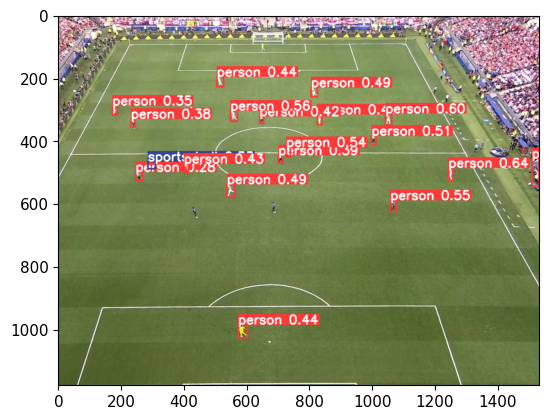

In [104]:
image = cv2.imread('media/cap1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detecciones = yolo(image)
plt.imshow(np.squeeze(detecciones.render()))
plt.show()

C:\Users\itzca\OneDrive\Documents\Tracker\translation\homography.py:47: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


0 (0, 222, 255)
1 (255, 171, 0)
2 (0, 0, 0)
3 (230, 255, 0)
1 (255, 171, 0)
1 (255, 171, 0)
0 (0, 222, 255)
0 (0, 222, 255)
0 (0, 222, 255)
1 (255, 171, 0)
0 (0, 222, 255)
1 (255, 171, 0)
0 (0, 222, 255)
0 (0, 222, 255)
[265, 284, (0, 222, 255)]
[253, 285, (255, 171, 0)]
[312, 170, (0, 0, 0)]
[260, 184, (230, 255, 0)]
[273, 303, (255, 171, 0)]
[271, 177, (255, 171, 0)]
[287, 206, (0, 222, 255)]
[285, 165, (0, 222, 255)]
[269, 220, (0, 222, 255)]
[272, 233, (255, 171, 0)]
[265, 263, (0, 222, 255)]
[286, 149, (255, 171, 0)]
[277, 120, (0, 222, 255)]
[284, 284, (0, 222, 255)]


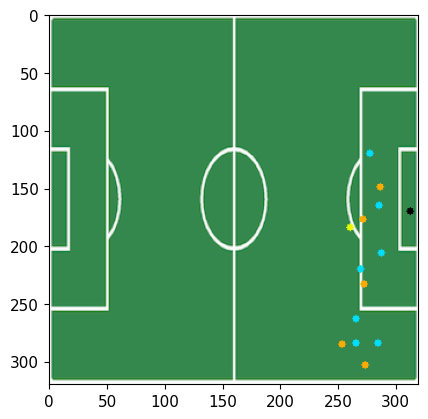

In [8]:
image = get_image('media/test_image.jpg')
#image = get_image('media/cap.png')

M = get_matrix(kp_model, image)
template_2d, players = show_template(yolo, template, M, image)
#template_2d = cv2.resize(template_2d, (1024, 1024))
%matplotlib inline 
plt.imshow(template_2d)
plt.show()

In [84]:
i = 0
for player in players:
    cv2.imwrite("media\\players\\{}.jpg".format(i), player)
    i += 1

In [94]:
classify(players)

Player 0 has label 0
Player 1 has label 1
Player 2 has label 2
Player 3 has label 3
Player 4 has label 1
Player 5 has label 1
Player 6 has label 0
Player 7 has label 0
Player 8 has label 0
Player 9 has label 1
Player 10 has label 0
Player 11 has label 1
Player 12 has label 0
